In [99]:
 from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
# from tqdm import tqdm_notebook
from itertools import product
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
import statsmodels
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


# VECTOR AUTO REGRESSION EQUATION:


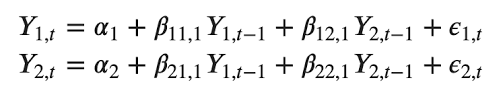

In [100]:
df = pd.read_csv(r'C:\Users\ASUS\Desktop\Study\Year_3\HK_6\Machine Learning\Multivariable GARCH\Bond-VN.csv',index_col=0,parse_dates = True)


In [101]:
df.drop(['GGVF3Y','Baserate','FER','Fiscal','Pubdebt','CurrentAcc'],axis=1,inplace=True)
df.head()

,GGVF1Y,GGVF5Y,CPI,Oilrate,FIR,Stockreturn
Time,,,,,,
2006-07-01,0.06150,0.08670,0.368,0.581238,5.5000,-18.072499
2006-08-01,0.06063,0.08325,0.381,-5.563768,5.4375,16.280391
2006-09-01,0.07600,0.08393,0.281,-10.459656,5.3750,7.237673
2006-10-01,0.07767,0.08388,0.280,-6.643357,5.3750,-2.883830
2006-11-01,0.07817,0.08417,0.572,7.490637,5.5000,23.753763


In [102]:
dff = df.iloc[1:]
dff.head()

,GGVF1Y,GGVF5Y,CPI,Oilrate,FIR,Stockreturn
Time,,,,,,
2006-08-01,0.06063,0.08325,0.381,-5.563768,5.4375,16.280391
2006-09-01,0.07600,0.08393,0.281,-10.459656,5.3750,7.237673
2006-10-01,0.07767,0.08388,0.280,-6.643357,5.3750,-2.883830
2006-11-01,0.07817,0.08417,0.572,7.490637,5.5000,23.753763
2006-12-01,0.07783,0.08292,0.555,-3.294267,5.5000,18.753653


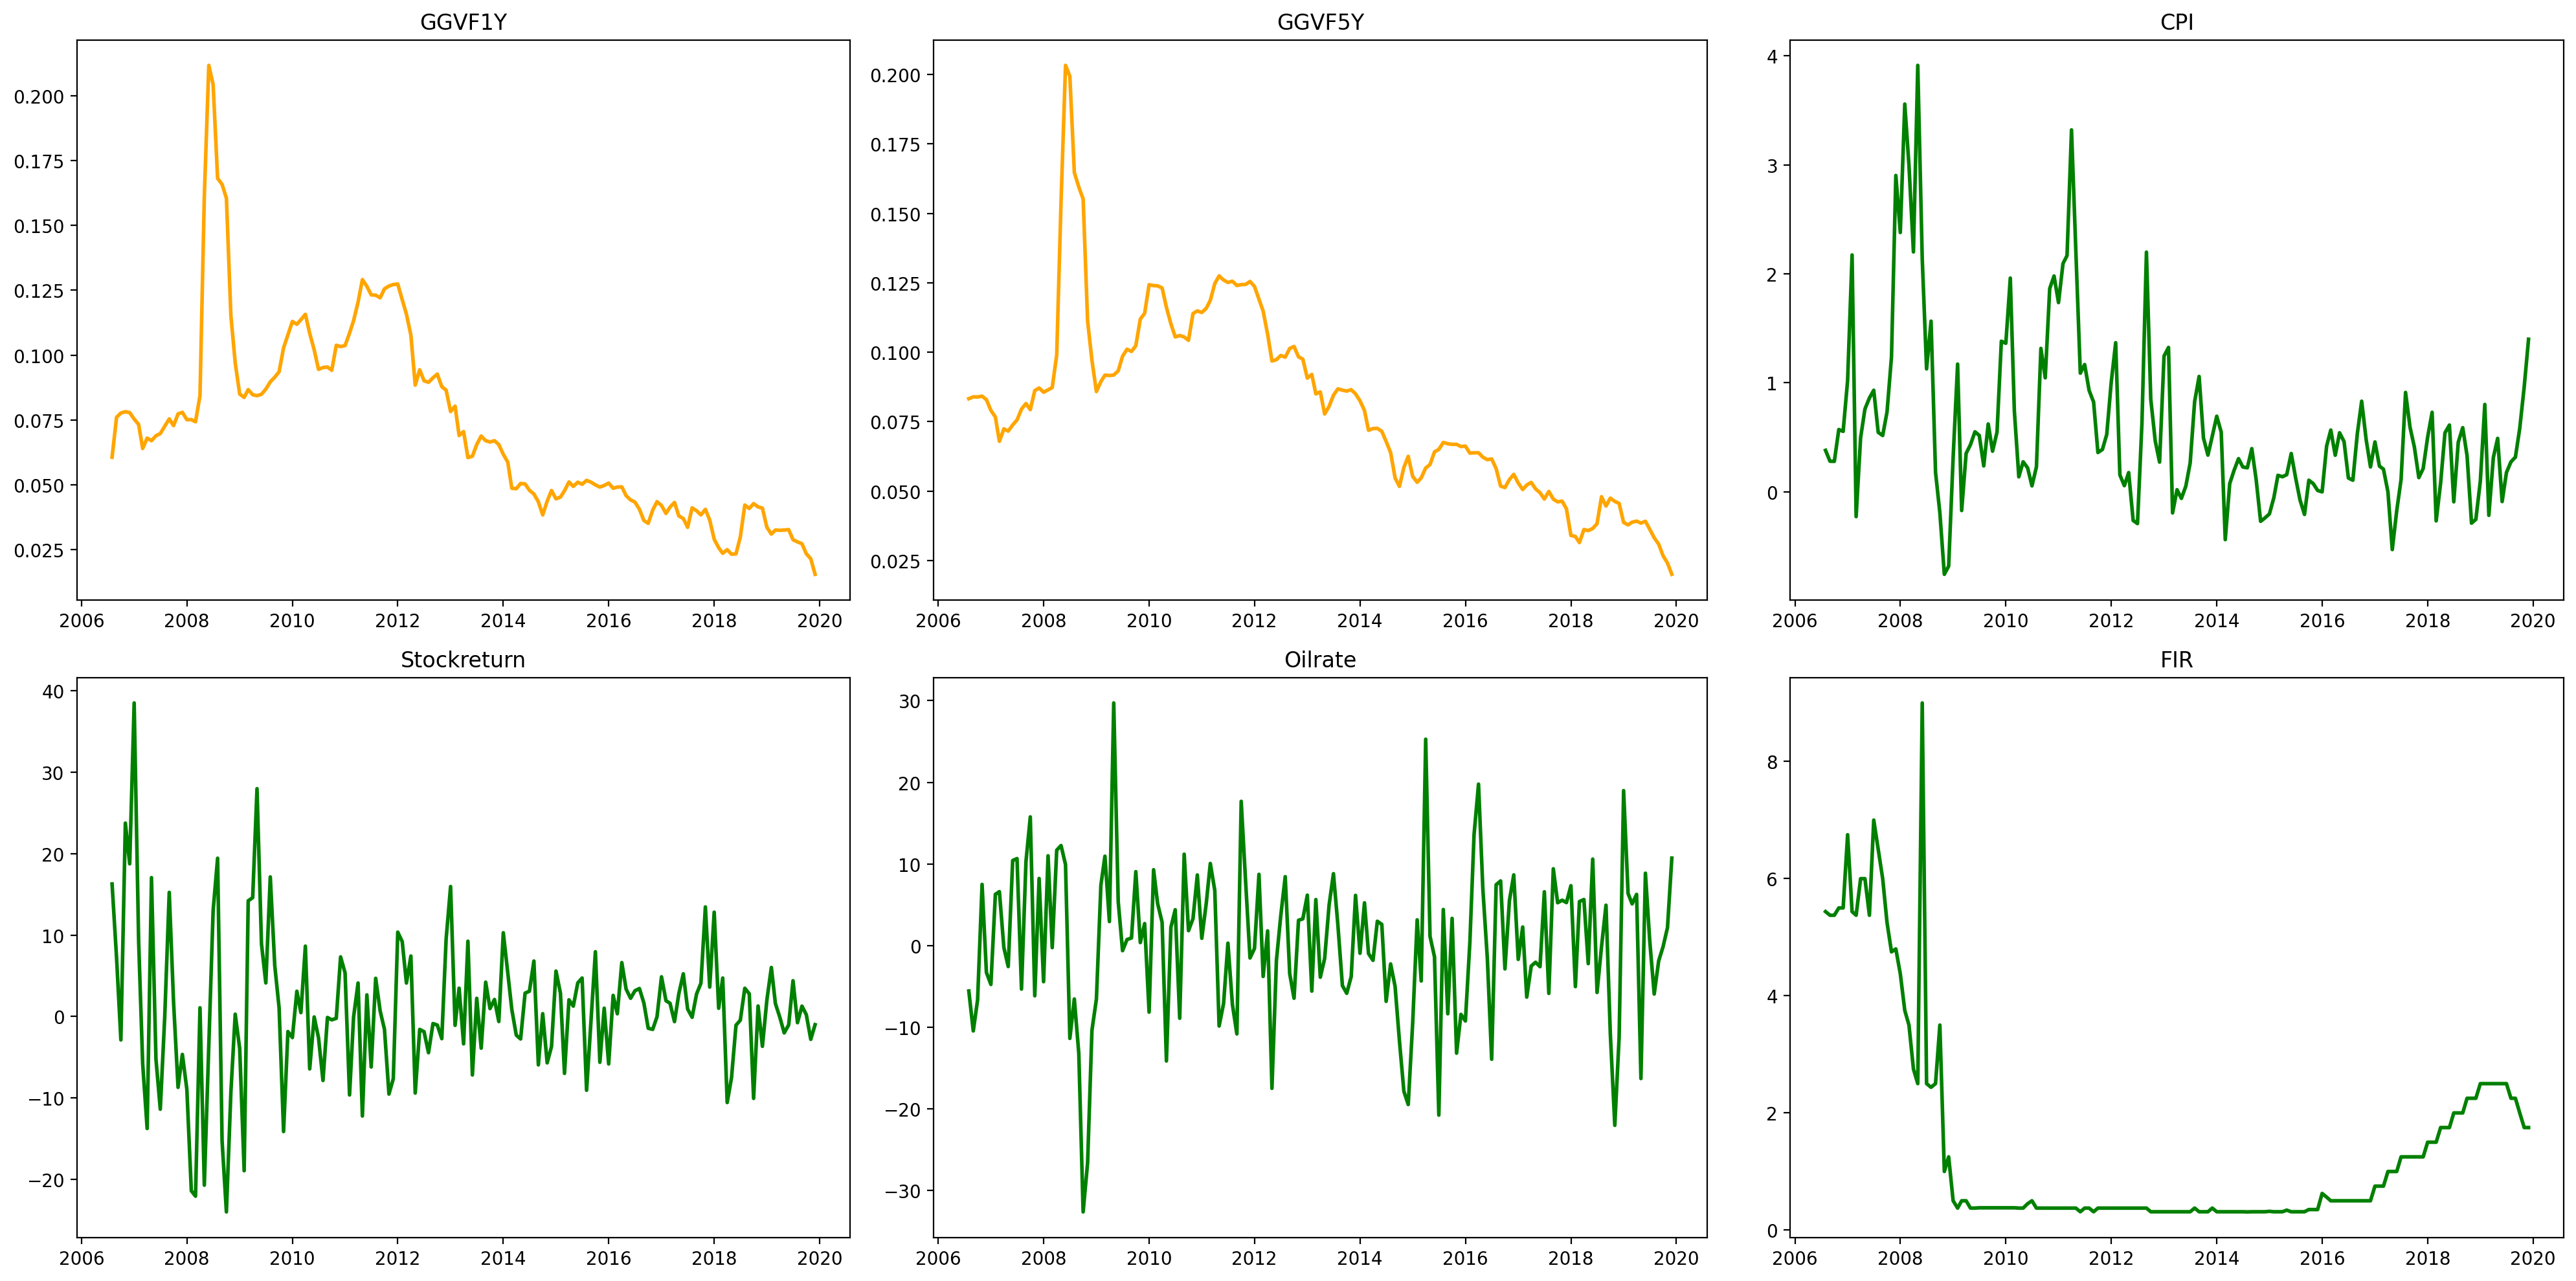

In [103]:
# using tuple unpacking for multiple Axes
fig, axs = plt.subplots(2,3, figsize=(20,10),dpi = 200)

axs[0,0].plot(dff.GGVF1Y,linewidth =2, color = 'orange')
axs[0,0].set_title('GGVF1Y')

axs[0,1].plot(dff.GGVF5Y,linewidth =2, color = 'orange')
axs[0,1].set_title('GGVF5Y')

axs[0,2].plot(dff.CPI,linewidth =2, color = 'green')
axs[0,2].set_title('CPI')

axs[1,0].plot(dff.Stockreturn,linewidth =2, color = 'green')
axs[1,0].set_title('Stockreturn')

axs[1,1].plot(dff.Oilrate,linewidth =2, color = 'green')
axs[1,1].set_title('Oilrate')

axs[1,2].plot(dff.FIR,linewidth =2, color = 'green')
axs[1,2].set_title('FIR')

# fig.suptitle('Vertically stacked subplots')
fig.tight_layout()

In [104]:
df_1st = df.diff().dropna()

In [105]:
df_1st

,GGVF1Y,GGVF5Y,CPI,Oilrate,FIR,Stockreturn
Time,,,,,,
2006-08-01,-0.00087,-0.00345,0.013,-6.145006,-0.0625,34.352891
2006-09-01,0.01537,0.00068,-0.100,-4.895887,-0.0625,-9.042719
2006-10-01,0.00167,-0.00005,-0.001,3.816299,0.0000,-10.121503
2006-11-01,0.00050,0.00029,0.292,14.133993,0.1250,26.637594
2006-12-01,-0.00034,-0.00125,-0.017,-10.784903,0.0000,-5.000110
...,...,...,...,...,...,...
2019-08-01,-0.00083,-0.00304,0.097,-6.524385,-0.2500,-5.158248
2019-09-01,-0.00071,-0.00232,0.044,4.071266,0.0000,2.036639
2019-10-01,-0.00386,-0.00414,0.264,1.702878,-0.2500,-1.043468


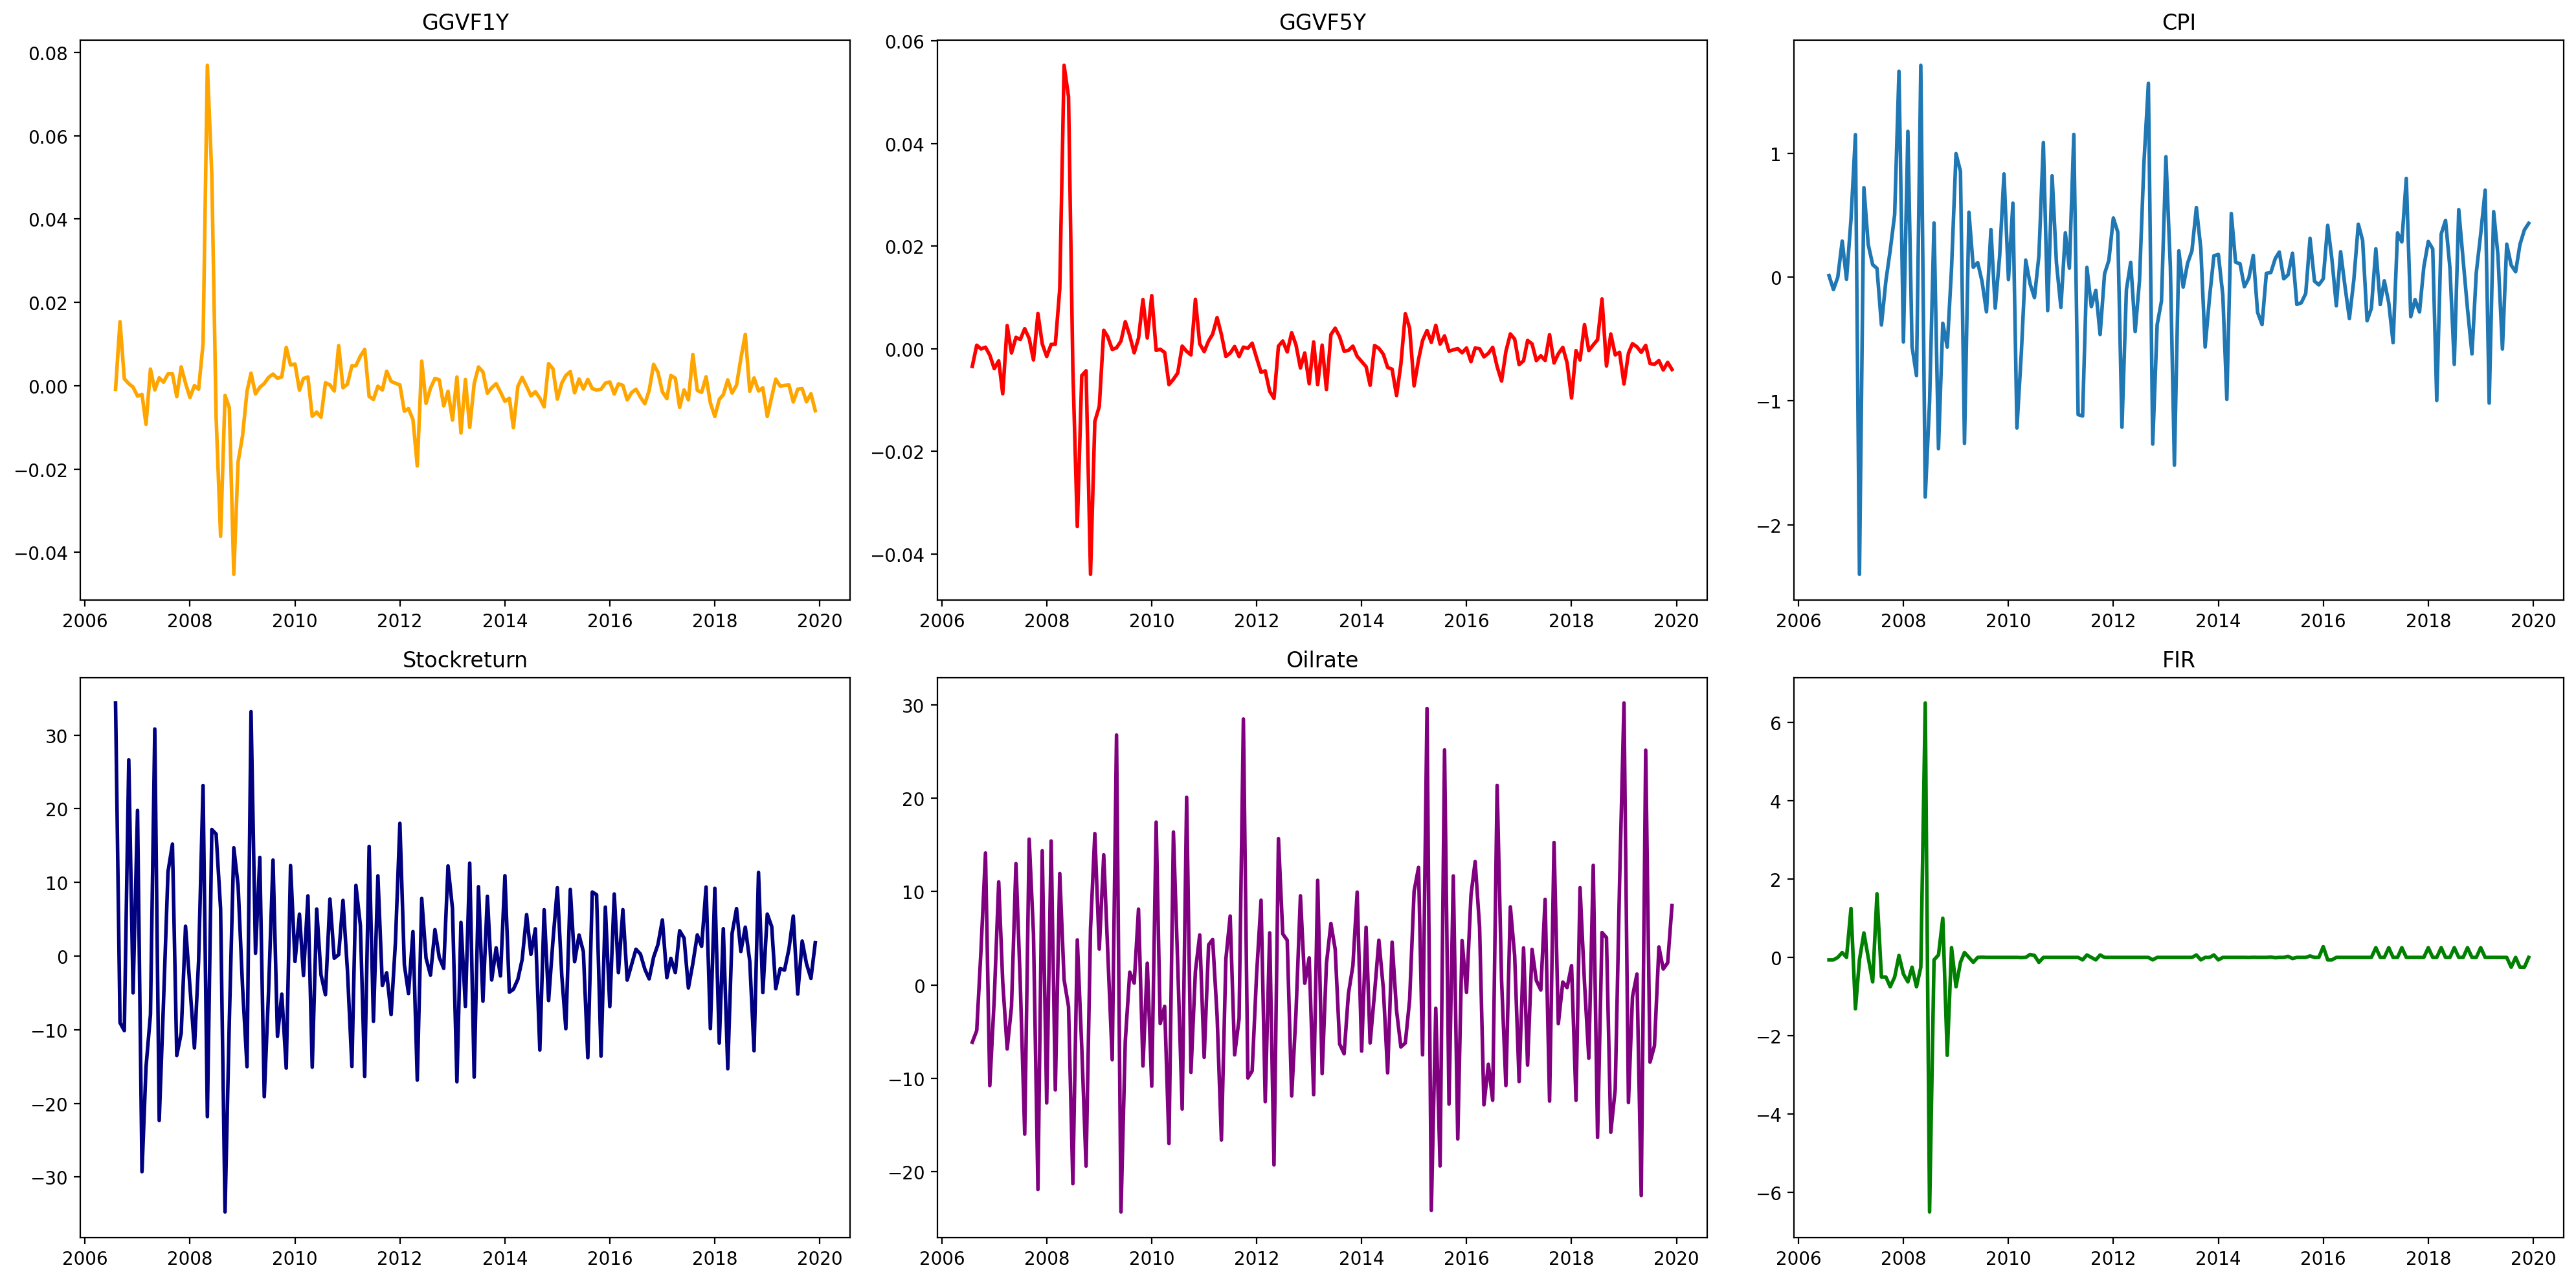

In [106]:
# using tuple unpacking for multiple Axes
fig, axs = plt.subplots(2,3, figsize=(20,10),dpi = 200)

axs[0,0].plot(df_1st.GGVF1Y,linewidth =2, color = 'orange')
axs[0,0].set_title('GGVF1Y')

axs[0,1].plot(df_1st.GGVF5Y,linewidth =2, color = 'red')
axs[0,1].set_title('GGVF5Y')

axs[0,2].plot(df_1st.CPI,linewidth =2)
axs[0,2].set_title('CPI')

axs[1,0].plot(df_1st.Stockreturn,linewidth =2, color = 'navy')
axs[1,0].set_title('Stockreturn')

axs[1,1].plot(df_1st.Oilrate,linewidth =2, color = 'purple')
axs[1,1].set_title('Oilrate')

axs[1,2].plot(df_1st.FIR,linewidth =2, color = 'green')
axs[1,2].set_title('FIR')

# fig.suptitle('Vertically stacked subplots')
fig.tight_layout()

In [107]:
# Define function adf_test
def adf_test(x):
    '''
    Null Hypothesis: time series is not stationary
    Alternate Hypothesis: time series is stationary
    '''
    indices = ['Test Statistic', 'p-value',
               '# of Lags Used', '# of Observations Used']

    adf_test = adfuller(x, autolag='AIC')
    results = pd.Series(adf_test[0:4], index = indices)

    for key, value in adf_test[4].items():
        results[f'Critical Value ({key})'] = value

    return results

# Define kpss test
def kpss_test(x):
    '''
    Null Hypothesis: time series is stationary
    Alternate Hypothesis: time series is not stationary
    '''
    indices = ['Test Statistic', 'p-value', '# of Lags']

    kpss_test = kpss(x)
    results = pd.Series(kpss_test[0:3], index = indices)

    for key, value in kpss_test[3].items():
        results[f'Critical Value ({key})'] = value

    return results

In [108]:
adf_test(df_1st.GGVF1Y)

Test Statistic           -6.638989e+00
p-value                   5.470391e-09
# of Lags Used            5.000000e+00
# of Observations Used    1.550000e+02
Critical Value (1%)      -3.473259e+00
Critical Value (5%)      -2.880374e+00
Critical Value (10%)     -2.576812e+00
dtype: float64

p-value < 0,05 => Chuỗi dừng

In [109]:
kpss_test(df_1st.GGVF1Y)

Test Statistic           0.087699
p-value                  0.100000
# of Lags                1.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

p-value > 0,05 => Chuỗi dừng

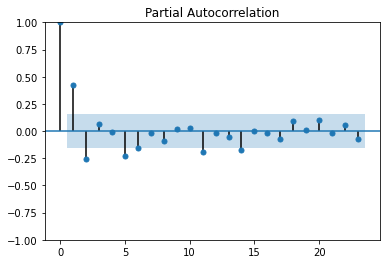

In [110]:
plot_pacf(df_1st.GGVF1Y)
plt.show()

In [111]:
obs = round(len(dff)*0.7)

df_train = dff.iloc[:obs]
df_1st_train = df_1st.iloc[:obs]

df_pred = dff.iloc[obs:]
df_1st_pred = df_1st.iloc[obs:]

In [112]:
model = VAR(endog=df_1st_train)

In [113]:
x = model.select_order(maxlags=6)
x.summary()

,AIC,BIC,FPE,HQIC
0,-12.35,-12.20,4.348e-06,-12.29
1,-13.71,-12.66*,1.110e-06,-13.29
2,-14.19,-12.24,6.904e-07,-13.40*
3,-14.22,-11.37,6.828e-07,-13.07
4,-14.53*,-10.79,5.147e-07*,-13.01
5,-14.30,-9.654,6.824e-07,-12.42
6,-14.38,-8.839,6.765e-07,-12.14


In [114]:
model_fit = model.fit(maxlags=4)

In [115]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 15, May, 2022
Time:                     10:38:18
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -10.7379
Nobs:                     109.000    HQIC:                  -12.9396
Log likelihood:           9.08067    FPE:                5.62012e-07
AIC:                     -14.4416    Det(Omega_mle):     1.62808e-07
--------------------------------------------------------------------
Results for equation GGVF1Y
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                 -0.000577         0.000902           -0.640           0.522
L1.GGVF1Y             -0.084710         0.340064           -0.249           0.803
L1.GGVF5Y              0.970695         0.423450       

In [116]:
# Get the lag order
lag_order = model_fit.k_ar
print(lag_order)

# Input data for forecasting
input_data = df_1st_train.values[-lag_order:]
print(input_data)

# forecasting
pred = model_fit.forecast(y=input_data, steps=len(df_pred))
pred = (pd.DataFrame(pred, index=df_pred.index, columns=df_1st_train.columns + '_pred'))
print(pred)

4
[[-7.00000000e-04 -4.70000000e-04 -1.32000000e-01 -1.27679200e+01
   0.00000000e+00  8.69314019e+00]
 [-1.02000000e-03 -2.30000000e-04  3.14000000e-01  1.16803385e+01
   3.75000000e-02  8.32363797e+00]
 [-8.50000000e-04  3.00000000e-05 -3.20000000e-02 -1.65054737e+01
   0.00000000e+00 -1.35759166e+01]
 [ 6.10000000e-04 -7.90000000e-04 -6.20000000e-02  4.74863304e+00
   0.00000000e+00  6.64299225e+00]]
            GGVF1Y_pred   GGVF5Y_pred  CPI_pred  Oilrate_pred  FIR_pred  \
Time                                                                      
2016-01-01    -0.000748 -5.072244e-04 -0.170136     -0.113080 -0.048078   
2016-02-01    -0.000402 -3.030225e-04 -0.199063      2.559120  0.041826   
2016-03-01     0.000435  5.256943e-04  0.406513     -2.358813 -0.204051   
2016-04-01     0.000264  3.977200e-04 -0.090441      0.258868  0.197956   
2016-05-01     0.000489  6.056861e-04 -0.006997      0.025998 -0.244154   
2016-06-01    -0.000600 -5.480283e-04 -0.013401      0.118177  0.071

In [117]:
# inverting transformation
def invert_transformation(df_train, pred_df):
  forecast = pred.copy()
  columns = df_train.columns
  for col in columns:
    forecast[str(col)+'_pred'] = df_train[col].iloc[-1] + forecast[str(col) +'_pred'].cumsum()
  return forecast


output = invert_transformation(df_train, pred)
print(output)
output_original = np.exp(output)
print(output_original)

            GGVF1Y_pred  GGVF5Y_pred  CPI_pred  Oilrate_pred  FIR_pred  \
Time                                                                     
2016-01-01     0.048992     0.065533 -0.157136     -8.543241  0.301922   
2016-02-01     0.048590     0.065230 -0.356199     -5.984121  0.343748   
2016-03-01     0.049024     0.065755  0.050314     -8.342934  0.139697   
2016-04-01     0.049288     0.066153 -0.040127     -8.084066  0.337653   
2016-05-01     0.049777     0.066759 -0.047124     -8.058067  0.093499   
2016-06-01     0.049177     0.066211 -0.060525     -7.939890  0.164557   
2016-07-01     0.049208     0.066382 -0.132984     -8.141033  0.055331   
2016-08-01     0.049730     0.066894 -0.062752     -8.669435  0.042176   
2016-09-01     0.049528     0.066665 -0.069231     -8.181358 -0.012265   
2016-10-01     0.049384     0.066788 -0.105669     -8.584991 -0.045272   
2016-11-01     0.048968     0.066348 -0.085912     -8.740427 -0.144912   
2016-12-01     0.048958     0.066448 -

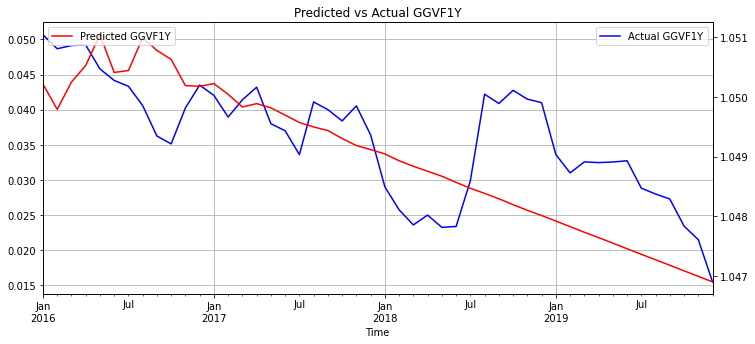

In [118]:
plt.figure(figsize= (12,5))
plt.xlabel('Date')
ax1=df_pred.GGVF1Y.plot(color='blue', grid = True, label='Actual GGVF1Y')
ax2=output_original.GGVF1Y_pred.plot(color='red', grid=True, secondary_y=True, label='Predicted GGVF1Y')
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.title('Predicted vs Actual GGVF1Y')
plt.show()

In [119]:
#Calculate forecast bias
forecast_errors = [df_pred['GGVF1Y'][i]- output_original['GGVF1Y_pred'][i] for i in range(len(df_pred['GGVF1Y']))]
bias = sum(forecast_errors) * 1.0/len(df_pred['GGVF1Y'])
print('Bias: %f' % bias)

mape = (mean_absolute_percentage_error(df_pred['GGVF1Y'],output_original['GGVF1Y_pred']))
print(f'MAPE: {round(mape,2)}%')

#Calculate mean absolute error
mae = mean_absolute_error(df_pred['GGVF1Y'],output_original['GGVF1Y_pred'])
print('MAE: %f' % mae)

#Calculate mean squared error and root mean squared error
mse = mean_squared_error(df_pred['GGVF1Y'],output_original['GGVF1Y_pred'])
print('MSE: %f' % mse)
rmse = np.sqrt(mse)
print('RMSE: %f' % rmse)

Bias: -1.013068
MAPE: 30.13%
MAE: 1.013068
MSE: 1.026362
RMSE: 1.013095


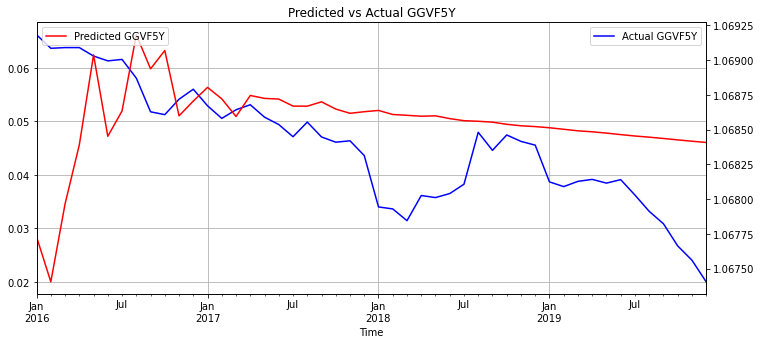

In [120]:
plt.figure(figsize= (12,5))
plt.xlabel('Date')
ax1=df_pred.GGVF5Y.plot(color='blue', grid = True, label='Actual GGVF5Y')
ax2=output_original.GGVF5Y_pred.plot(color='red', grid=True, secondary_y=True, label='Predicted GGVF5Y')
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.title('Predicted vs Actual GGVF5Y')
plt.show()

In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [122]:
#Calculate forecast bias
forecast_errors = [df_pred['GGVF5Y'][i]- output_original['GGVF5Y_pred'][i] for i in range(len(df_pred['GGVF5Y']))]
bias = sum(forecast_errors) * 1.0/len(df_pred['GGVF5Y'])
print('Bias: %f' % bias)

mape = (mean_absolute_percentage_error(df_pred['GGVF5Y'],output_original['GGVF5Y_pred']))
print(f'MAPE: {round(mape,2)}%')

#Calculate mean absolute error
mae = mean_absolute_error(df_pred['GGVF5Y'],output_original['GGVF5Y_pred'])
print('MAE: %f' % mae)

#Calculate mean squared error and root mean squared error
mse = mean_squared_error(df_pred['GGVF5Y'],output_original['GGVF5Y_pred'])
print('MSE: %f' % mse)
rmse = np.sqrt(mse)
print('RMSE: %f' % rmse)

Bias: -1.023075
MAPE: 24.18%
MAE: 1.023075
MSE: 1.046805
RMSE: 1.023135


# VECM

In [1]:
import statsmodels.tsa.vector_ar.vecm as vecm
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.vecm import VECM

In [124]:
# In order to fit a VECM model, we need to determine the number of co-integrating relationships using a VEC rank test.
vec_rank1 = vecm.select_coint_rank(df_train, det_order = 1, k_ar_diff = 1, method = 'trace', signif=0.01)
print(vec_rank1.summary())

Johansen cointegration test using trace test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   6          211.5          117.0
  1   6          134.1          87.77
  2   6          86.52          62.52
  3   6          42.76          41.08
  4   6          13.39          23.15
-------------------------------------


In [125]:
vec_rank2 = vecm.select_coint_rank(df_train, det_order = 1, k_ar_diff = 1, method = 'maxeig', signif=0.01)
print(vec_rank2.summary())

Johansen cointegration test using maximum eigenvalue test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          77.36          49.41
  1   2          47.57          42.86
  2   3          43.76          36.19
  3   4          29.37          29.26
  4   5          9.524          21.75
-------------------------------------


In [126]:
vecm = VECM(endog = df_train, k_ar_diff = 9, coint_rank = 3, deterministic = 'ci')
vecm_fit = vecm.fit()
vecm_fit.predict(steps=10)

array([[ 0.04031567,  0.06056621, -0.32446179, -9.13015998, -0.05903483,
        -2.02374963],
       [ 0.04140716,  0.05968957, -0.01807783,  5.34409015, -0.37361609,
         6.14083177],
       [ 0.03550613,  0.05476316,  0.34914909, -9.10686801, -0.08354427,
         4.67156044],
       [ 0.03774011,  0.05498948, -0.04761993,  3.01377958,  0.07612577,
         2.0647783 ],
       [ 0.02129476,  0.04157053, -0.51649916, -9.94614676, -0.21395393,
         1.99056765],
       [ 0.01846922,  0.03916942, -0.44341295,  0.23265707, -0.80295819,
        -0.11405928],
       [ 0.02218616,  0.04346111, -0.13571917, -2.79926317,  0.03014262,
         4.96658183],
       [ 0.03065594,  0.05037423, -0.27643839, -1.66217281, -0.18068358,
         1.77545942],
       [ 0.03079676,  0.05107389, -0.23525239, -2.22919972, -0.08784305,
         7.42875172],
       [ 0.034729  ,  0.05279306, -0.29209994,  1.41958558,  0.03052615,
         3.48348219]])

In [134]:
forecast, lower, upper = vecm_fit.predict(10, 0.05)
print('lower bounds of confidence intervals:')
print(lower.round(3))
print('\nnpoint forecasts:')
print(forecast.round(3))
print('\nnupper bounds of confidence intervals:')
print(upper.round(3))

lower bounds of confidence intervals:
[[ 3.1000e-02  5.4000e-02 -1.0030e+00 -2.1023e+01 -6.5200e-01 -1.0079e+01]
 [ 2.5000e-02  4.7000e-02 -9.3900e-01 -6.9760e+00 -1.2830e+00 -2.1790e+00]
 [ 1.5000e-02  3.8000e-02 -7.2900e-01 -2.2169e+01 -1.0830e+00 -3.9890e+00]
 [ 1.4000e-02  3.6000e-02 -1.2320e+00 -1.0549e+01 -9.8500e-01 -7.2350e+00]
 [-6.0000e-03  1.9000e-02 -1.7680e+00 -2.4233e+01 -1.4030e+00 -7.8450e+00]
 [-1.4000e-02  1.2000e-02 -1.7950e+00 -1.4423e+01 -2.0900e+00 -1.0530e+01]
 [-1.5000e-02  1.2000e-02 -1.5390e+00 -1.7637e+01 -1.3280e+00 -5.6140e+00]
 [-1.2000e-02  1.4000e-02 -1.7420e+00 -1.6781e+01 -1.5760e+00 -9.0910e+00]
 [-1.7000e-02  1.1000e-02 -1.7130e+00 -1.7505e+01 -1.5120e+00 -4.1140e+00]
 [-1.7000e-02  1.0000e-02 -1.7770e+00 -1.4372e+01 -1.4920e+00 -8.8100e+00]]

npoint forecasts:
[[ 0.04   0.061 -0.324 -9.13  -0.059 -2.024]
 [ 0.041  0.06  -0.018  5.344 -0.374  6.141]
 [ 0.036  0.055  0.349 -9.107 -0.084  4.672]
 [ 0.038  0.055 -0.048  3.014  0.076  2.065]
 [ 0.021  0.

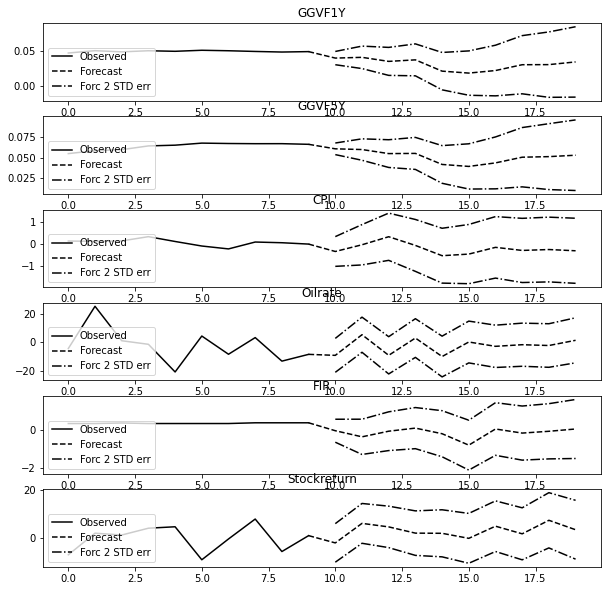

In [135]:
vecm_fit.plot_forecast(steps=10, n_last_obs=10)
